## Implementation of simple quantum communication protocol using classical communitation channel

C:\Users\hubma\AppData\Local\Temp\ipykernel_17096\3124806306.py:24: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(2).c_if(1, 1)
C:\Users\hubma\AppData\Local\Temp\ipykernel_17096\3124806306.py:25: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(2).c_if(0, 1)


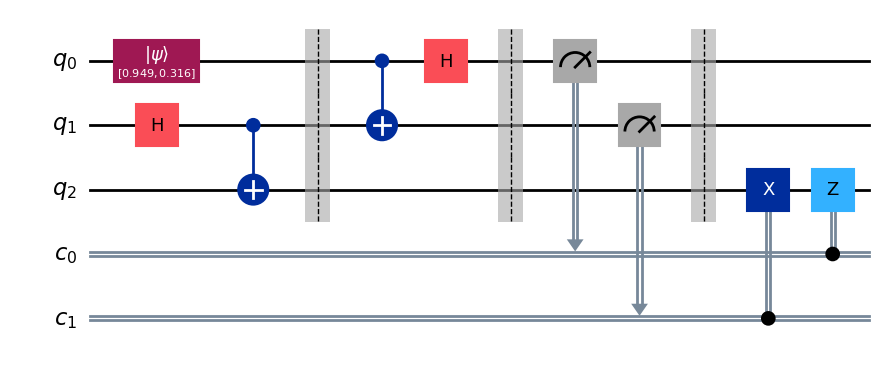

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate, QFTGate
from qiskit.quantum_info import Statevector
import numpy as np

q_state = Statevector(np.array([np.sqrt(0.9), np.sqrt(0.1)]))

# initialize qubit to transfer
qc = QuantumCircuit(3, 2)
qc.initialize(q_state, 0)

# create a Bell pair between Alice and Bob
qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.barrier()

qc.measure([0, 1], [0, 1])
qc.barrier()

qc.x(2).c_if(1, 1)
qc.z(2).c_if(0, 1)

qc.draw('mpl', style='iqp', cregbundle=False)

{'0': 916, '1': 109}


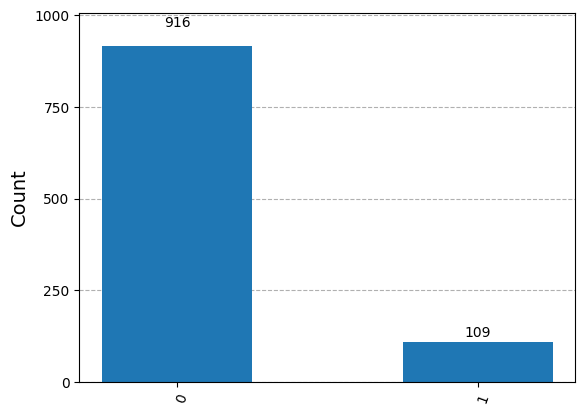

In [2]:
from qiskit_aer import AerSimulator
from qiskit.transpiler import PassManager
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile  

aer_sim = AerSimulator()

qc.measure_all()
transpiled_circuit = transpile(qc, aer_sim)

result = aer_sim.run(transpiled_circuit).result()

raw_counts = result.get_counts()
counts = {'0': 0, '1': 1}

for key, value in raw_counts.items():
    counts[key[0]] += value

print(counts)

plot_histogram(counts)